In [1]:
# Import local modules
import sys
import os
import glob

# Import third party modules
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime

In [2]:
# Set up the path to the SST data
# get the current working directory
# remove the last folder from the path
# and add the data folder
data_path = "/workspaces/MTMA33_Computing/practical_9/data/sst_comparisons(1).nc"

# Load the SST data into an Iris cube
dataset = xr.open_dataset(data_path)

In [3]:
dataset

<xarray.Dataset>
Dimensions:          (Length_dataset_1: 23, Length_dataset_2: 27)
Dimensions without coordinates: Length_dataset_1, Length_dataset_2
Data variables:
    SST_sat_1        (Length_dataset_1) float32 ...
    Time_1           (Length_dataset_1) datetime64[ns] ...
    Moored_Buoy_1    (Length_dataset_1) float32 ...
    SST_sat_2        (Length_dataset_2) float32 ...
    Time_2           (Length_dataset_2) int32 ...
    Drifting_Buoy_2  (Length_dataset_2) float32 ...
Attributes:
    title:    Data for MTMA33 Session 8

In [4]:
# Extract the variable
time_2 = dataset.variables['Time_2']
time_1 = dataset.variables['Time_1']
sst_sat_1 = dataset.variables['SST_sat_1']
sst_sat_2 = dataset.variables['SST_sat_2']
moored_buoy_1 = dataset.variables['Moored_Buoy_1']
drifting_buoy_2 = dataset.variables['Drifting_Buoy_2']

In [5]:
# convert time1 from seconds to hours using datetime
# seconds since 2010-01-01 00:00:00
# convert to hours using datetime
time_1 = [datetime(2010, 1, 1, 0, 0, 0) + np.timedelta64(int(t), 's') for t in time_1]

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('O') and dtype('<m8[s]')

ValueError: x and y must have same first dimension, but have shapes (23,) and (27,)

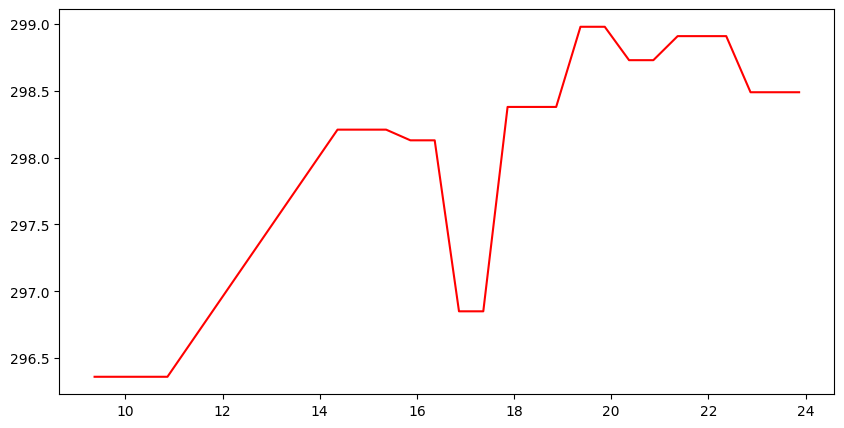

In [6]:
# For the drifting buoy data, plot both in-situ and satellite data as a
# function of time. Use a different colour for each data set. Add a legend
# to the plot to identify the two data sets. Label the x-axis as 'Time (hours)'
# and the y-axis as 'Sea surface temperature (K)'.
plt.figure(figsize=(10, 5))
plt.plot(time_2, drifting_buoy_2, label="Drifting Buoy 2", color="red")
plt.plot(time_2, sst_sat_2, label="Satellite 2", color="blue")
plt.xlabel("Time (hours)")
plt.ylabel("Sea surface temperature (K)")
plt.legend()